In [1]:
import pandas as pd
import seaborn as sns

df= pd.read_csv('email_phishing_data.csv')

print(df.columns)

Index(['num_words', 'num_unique_words', 'num_stopwords', 'num_links',
       'num_unique_domains', 'num_email_addresses', 'num_spelling_errors',
       'num_urgent_keywords', 'label'],
      dtype='object')


In [2]:
df

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
524841,782,327,301,2,2,2,52,1,0
524842,36,30,11,0,0,0,4,0,1
524843,61,46,11,0,0,0,3,0,0
524844,213,136,89,0,0,0,18,0,0


In [3]:
df.describe()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
count,5.248460e+05,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000
mean,2.762280e+02,123.012167,80.045465,0.895588,0.347767,2.114897,24.694731,0.245301,0.013240
std,3.335457e+03,201.626478,1023.330380,5.603001,1.774209,13.592682,311.312358,0.559320,0.114301
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000e+01,38.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.200000e+02,79.000000,34.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
75%,2.690000e+02,145.000000,79.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000
max,2.339682e+06,51251.000000,720411.000000,824.000000,524.000000,1150.000000,190104.000000,7.000000,1.000000


In [4]:
df[df['label'] == 0].shape[0]

517897

In [5]:
df[df['label'] == 1].shape[0]

6949

In [35]:
df['label'].value_counts()

label
0    517897
1      6949
Name: count, dtype: int64

In [6]:
df['num_words'].describe()
df['num_words'].value_counts().sort_index()

num_words
0            8
1           18
2           69
3          559
4          692
          ... 
55145        1
63501        1
101796       1
103407       1
2339682      1
Name: count, Length: 4278, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524846 entries, 0 to 524845
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   num_words            524846 non-null  int64
 1   num_unique_words     524846 non-null  int64
 2   num_stopwords        524846 non-null  int64
 3   num_links            524846 non-null  int64
 4   num_unique_domains   524846 non-null  int64
 5   num_email_addresses  524846 non-null  int64
 6   num_spelling_errors  524846 non-null  int64
 7   num_urgent_keywords  524846 non-null  int64
 8   label                524846 non-null  int64
dtypes: int64(9)
memory usage: 36.0 MB


<Axes: xlabel='num_words'>

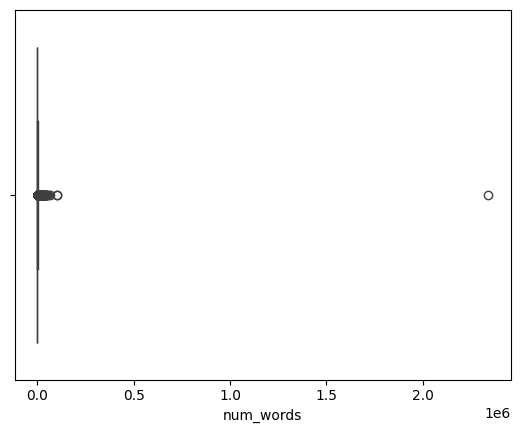

In [8]:
sns.boxplot(x=df['num_words'])

<Axes: xlabel='num_words'>

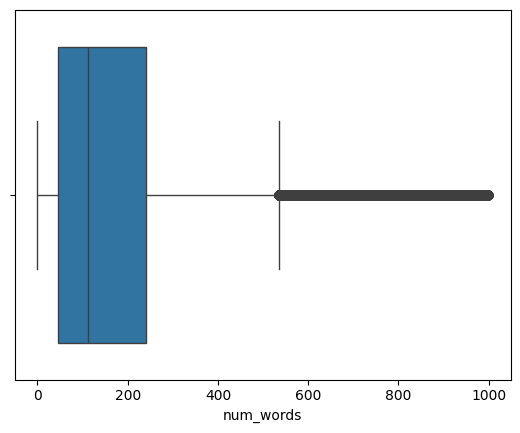

In [9]:
sns.boxplot(x=df[df['num_words'] < 1000]['num_words'])

<Axes: xlabel='num_words', ylabel='Count'>

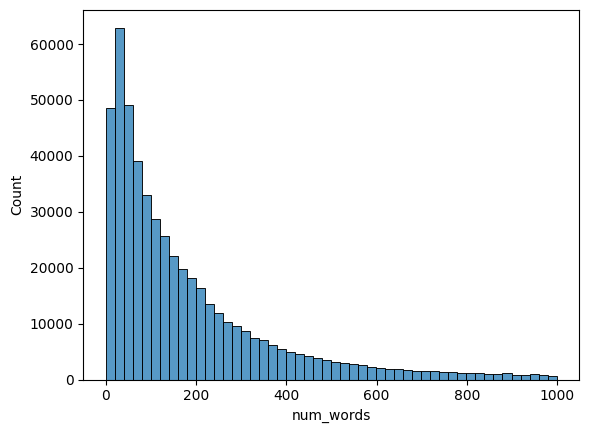

In [10]:
#מספר מילים במייל
#sns.histplot(data=df,x='num_words',discrete=True,bins=30)
sns.histplot(data=df[df['num_words'] < 1000], x='num_words', bins=50)

<Axes: xlabel='num_words', ylabel='Count'>

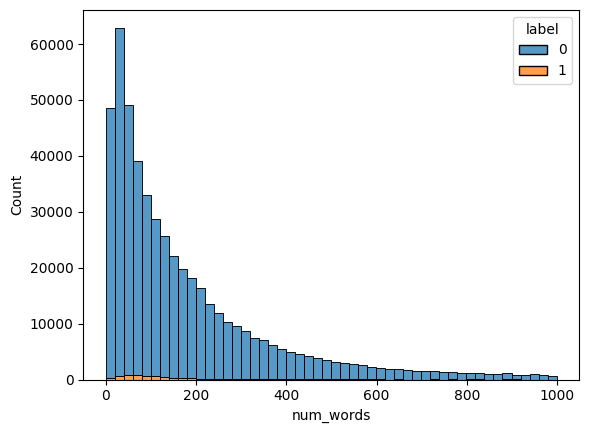

In [11]:
sns.histplot(data=df[df['num_words'] < 1000], x='num_words', bins=50,hue='label',multiple='stack')

<Axes: xlabel='label', ylabel='count'>

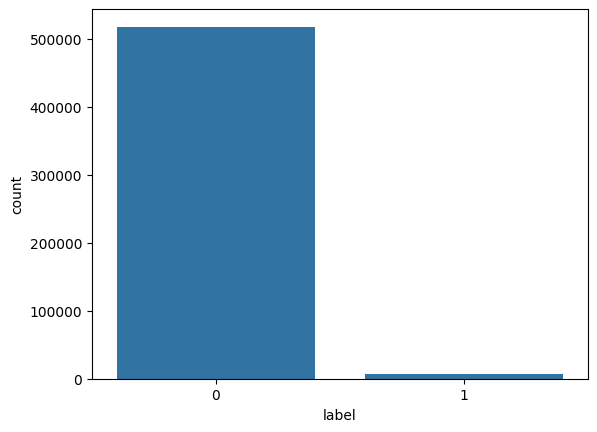

In [12]:
#כמות פישיניג לעומת כאלו שלא
sns.countplot(data=df,x='label')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X,y=df.drop(columns='label'),df['label']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.33, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [16]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
clf.score(X_train, y_train)

0.9985098650347224

In [18]:
clf.score(X_test,y_test)

0.9895323325635104

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
c_matrix=confusion_matrix(y_test, clf.predict(X_test))

<Axes: >

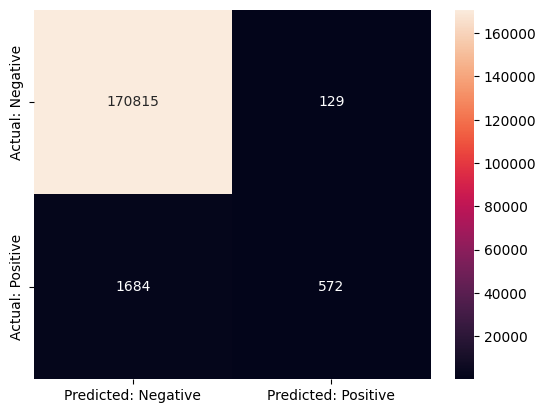

In [21]:
sns.heatmap(c_matrix, annot=True, fmt='g',
            xticklabels=["Predicted: Negative", "Predicted: Positive"], # תחזית של המודל
            yticklabels=["Actual: Negative", "Actual: Positive"])    # ערכי האמת

In [22]:
tn, fp, fn, tp = c_matrix.ravel()

print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 572
False Positives (FP): 129
True Negatives (TN): 170815
False Negatives (FN): 1684


In [23]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Precision (TP / (TP + FP)) : {precision:.2f}")
print(f"Recall (TP / (TP + FN))    : {recall:.2f}")
print(f"F1 Score                   : {f1:.2f}")

Precision (TP / (TP + FP)) : 0.82
Recall (TP / (TP + FN))    : 0.25
F1 Score                   : 0.39


<h5>ניתוח</h5>
<p>
נמוך יחסית Recall-לפי ערכי המדדים ניתן לראות כי ערך ה<br>
False Negatives המשמעות היא שיש כמות גבוהה של <br>
כלומר המודל מפספס בזיהוי תוצאות חיוביות
</p>

##### שיפור
לבדוק איזון בין הקלאסים

In [24]:
clf_2=RandomForestClassifier(class_weight='balanced')
clf_2.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [25]:
clf_2.score(X_train, y_train)

0.9923502613423727

In [26]:
clf_2.score(X_test,y_test)

0.9829214780600461

In [27]:
c_matrix_2=confusion_matrix(y_test, clf_2.predict(X_test))

<Axes: >

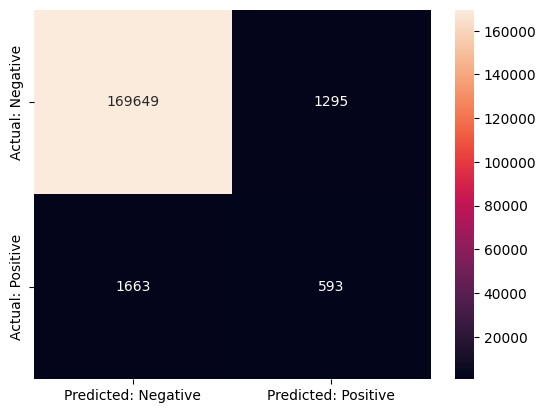

In [28]:
sns.heatmap(c_matrix_2, annot=True, fmt='g',
            xticklabels=["Predicted: Negative", "Predicted: Positive"], # תחזית של המודל
            yticklabels=["Actual: Negative", "Actual: Positive"])    # ערכי האמת

In [29]:
tn_2, fp_2, fn_2, tp_2 = c_matrix_2.ravel()

print(f"True Positives (TP): {tp_2}")
print(f"False Positives (FP): {fp_2}")
print(f"True Negatives (TN): {tn_2}")
print(f"False Negatives (FN): {fn_2}")

True Positives (TP): 593
False Positives (FP): 1295
True Negatives (TN): 169649
False Negatives (FN): 1663


In [30]:
precision_2 = tp_2 / (tp_2 + fp_2)
recall_2 = tp_2 / (tp_2 + fn_2)
f1_2 = 2 * (precision_2 * recall_2) / (precision_2 + recall_2)

print(f"Precision (TP / (TP + FP)) : {precision_2:.2f}")
print(f"Recall (TP / (TP + FN))    : {recall_2:.2f}")
print(f"F1 Score                   : {f1_2:.2f}")

Precision (TP / (TP + FP)) : 0.31
Recall (TP / (TP + FN))    : 0.26
F1 Score                   : 0.29


<h5>ניתוח</h5>
<p>
נמוך יחסית Recall-לפי ערכי המדדים ניתן לראות כי ערך ה<br>
נמוך Precision וכן הערך  <br>
False Positives ושל False Negatives המשמעות היא שיש כמות גבוהה של <br>
כלומר יכולת המודל לא טובה דיה
</p>

##### שיפור
Overfitting נבחן הגבלת עומק למניעת

In [31]:
clf_3=RandomForestClassifier(max_depth=20,class_weight='balanced')
clf_3.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20)

In [32]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score
lgb_model = LGBMClassifier(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
y_pred_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

print("LightGBM Performance:")
print(confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_lgb))

[LightGBM] [Info] Number of positive: 4693, number of negative: 346953
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1371
[LightGBM] [Info] Number of data points in the train set: 351646, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.013346 -> initscore=-4.303117
[LightGBM] [Info] Start training from score -4.303117
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Performance:
[[170900     44]
 [  2089    167]]
              precision    recall  f1-score   support

           0       0.99      1

In [33]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score
lgb_model = LGBMClassifier(
    max_depth=6,
    class_weight='balanced',
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
y_pred_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

print("LightGBM Performance:")
print(confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_lgb))

[LightGBM] [Info] Number of positive: 4693, number of negative: 346953
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1371
[LightGBM] [Info] Number of data points in the train set: 351646, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
LightGBM Performance:
[[132536  38408]
 [   475   1781]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.87    170944
           1       0.04      0.79      0.08      2256

    accuracy                           0.78    173200
   macro avg       0.52      0.78      0.48    173200
weighted avg       0.98      0.78      0.86    173200

ROC-AUC Score: 0.8660556994547258


In [36]:
# יש פער גדול בין כמות האימילים פישיניג לבין התקינים 
# נקטין את כמות המיילים התקינים
phishing_df = df[df['label'] ==1] 
legit_df = df[df['label'] == 0].sample(n=len(phishing_df), random_state=42) 
balanced_df = pd.concat([phishing_df, legit_df])

In [37]:
# ערבוב נתונים
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [38]:
balanced_df['label'].value_counts()

label
1    6949
0    6949
Name: count, dtype: int64

In [40]:
X_b,y_b=balanced_df.drop(columns='label'),balanced_df['label']
X_train_b, X_test_b, y_train_b, y_test_b =train_test_split(X_b,y_b,test_size=0.33, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
clf_5=LogisticRegression()
clf_5.fit(X_train_b, y_train_b)

LogisticRegression()

In [43]:
clf_5.score(X_train, y_train)

0.5371737485994438

In [44]:
clf_5.score(X_test,y_test)

0.5350692840646651

In [45]:
clf_5.score(X_train_b, y_train_b)

0.6423585006980991

In [46]:
clf_5.score(X_test_b,y_test_b)

0.6468279921517331

In [47]:
c_matrix_5=confusion_matrix(y_test_b, clf_5.predict(X_test_b))

<Axes: >

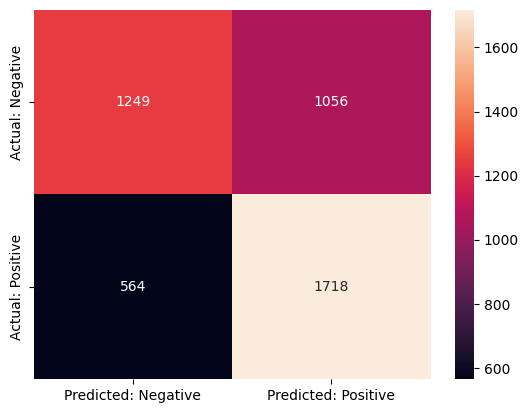

In [48]:
sns.heatmap(c_matrix_5, annot=True, fmt='g',
            xticklabels=["Predicted: Negative", "Predicted: Positive"], # תחזית של המודל
            yticklabels=["Actual: Negative", "Actual: Positive"])    # ערכי האמת

In [49]:
tn_5, fp_5, fn_5, tp_5 = c_matrix_5.ravel()

print(f"True Positives (TP): {tp_5}")
print(f"False Positives (FP): {fp_5}")
print(f"True Negatives (TN): {tn_5}")
print(f"False Negatives (FN): {fn_5}")

True Positives (TP): 1718
False Positives (FP): 1056
True Negatives (TN): 1249
False Negatives (FN): 564


In [50]:
precision_5 = tp_5 / (tp_5 + fp_5)
recall_5 = tp_5 / (tp_5 + fn_5)
f1_5 = 2 * (precision_5 * recall_5) / (precision_5 + recall_5)

print(f"Precision (TP / (TP + FP)) : {precision_5:.2f}")
print(f"Recall (TP / (TP + FN))    : {recall_5:.2f}")
print(f"F1 Score                   : {f1_5:.2f}")

Precision (TP / (TP + FP)) : 0.62
Recall (TP / (TP + FN))    : 0.75
F1 Score                   : 0.68


In [52]:
clf_5=RandomForestClassifier()
clf_5.fit(X_train_b, y_train_b)

RandomForestClassifier()

In [55]:
clf_5.score(X_train, y_train)

0.7770428214738686

In [56]:
clf_5.score(X_test,y_test)

0.7793822170900693

In [57]:
clf_5.score(X_train_b, y_train_b)

0.9901192138331006

In [58]:
clf_5.score(X_test_b,y_test_b)

0.7822105951602355

In [59]:
c_matrix_5=confusion_matrix(y_test_b, clf_5.predict(X_test_b))

<Axes: >

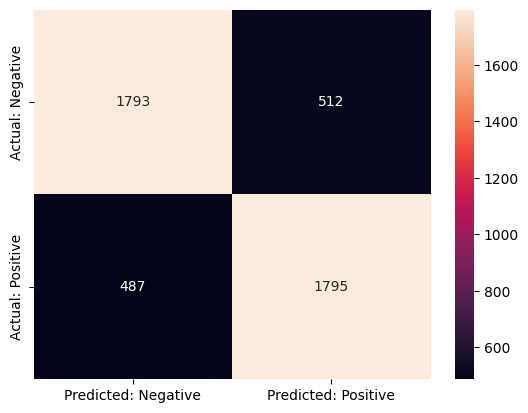

In [60]:
sns.heatmap(c_matrix_5, annot=True, fmt='g',
            xticklabels=["Predicted: Negative", "Predicted: Positive"], # תחזית של המודל
            yticklabels=["Actual: Negative", "Actual: Positive"])    # ערכי האמת

In [61]:
tn_5, fp_5, fn_5, tp_5 = c_matrix_5.ravel()

print(f"True Positives (TP): {tp_5}")
print(f"False Positives (FP): {fp_5}")
print(f"True Negatives (TN): {tn_5}")
print(f"False Negatives (FN): {fn_5}")

True Positives (TP): 1795
False Positives (FP): 512
True Negatives (TN): 1793
False Negatives (FN): 487


In [62]:
precision_5 = tp_5 / (tp_5 + fp_5)
recall_5 = tp_5 / (tp_5 + fn_5)
f1_5 = 2 * (precision_5 * recall_5) / (precision_5 + recall_5)

print(f"Precision (TP / (TP + FP)) : {precision_5:.2f}")
print(f"Recall (TP / (TP + FN))    : {recall_5:.2f}")
print(f"F1 Score                   : {f1_5:.2f}")

Precision (TP / (TP + FP)) : 0.78
Recall (TP / (TP + FN))    : 0.79
F1 Score                   : 0.78
